<h1>Speed Dating: Who to Date Long Term</h1>

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.<br>

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.<br>

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.<br>

For more analysis from Iyengar and Fisman, read Racial Preferences in Dating.<br>

Data Exploration Ideas<br>

What are the least desirable attributes in a male partner? Does this differ for female partners?<br>
How important do people think attractiveness is in potential mate selection vs. its real impact?<br>
Are shared interests more important than a shared racial background?<br>
Can people accurately predict their own perceived value in the dating market?<br>
In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

In [1]:
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display
%matplotlib inline

print('pandas version is {}.'.format(pd.__version__))
print('numpy version is {}.'.format(np.__version__))
print('scikit-learn version is {}.'.format(sklearn.__version__))

pandas version is 0.18.0.
numpy version is 1.10.4.
scikit-learn version is 0.17.1.


In [2]:
data = pd.read_csv("Speed Dating Data.csv")
print "This set has {} data points and {} features.".format(*data.shape)

This set has 8378 data points and 195 features.


<h6>Initialize features to explore what Women and Men look for in a partner.</h6>

In [3]:
features = ["attr1_", "sinc1_", "intel1_", "fun1_", "amb1_", "shar1_"]#general feature set will append number at end
of_the_day = [j + str(i) for i in range(1,2) for j in features]#feature set for desired traits at start of event waves 1 - 5 & waves 10 - 21
half_way = [j + 's' for j in features]#feature set for desired traits half way through event waves 6 - 9
a_day_after = [j + str(i) for i in range(2,3) for j in features]#feature set for desired traits day after the event
three_weeks_after = [j + str(i) for i in range(3,4) for j in features]#feature set for desired traits 3 - 4 weeks after the event
you_looking_for = ['iid', 'wave', 'gender']#exploratory features
listing_of_features = [of_the_day, half_way, a_day_after, three_weeks_after]
for i in listing_of_features:
    for j in i:
        you_looking_for.append(j)

In [4]:
stuff = pd.DataFrame(data = data, columns = you_looking_for)
unique_iid = stuff.copy()
unique_iid.drop_duplicates(keep = 'first', inplace = True)
self_perception_of_the_day_starting = pd.DataFrame(data = unique_iid, columns = you_looking_for[0:9])

<h6>This block looks at what both Women and Men look for in an ideal partner at the beginning of the event. Statistics include both genders.</h6>

In [5]:
waves_men_women = self_perception_of_the_day_starting.copy()
waves_men_women.fillna(value = 0, inplace = True)
new_waves_men_women = waves_men_women.drop(['iid', 'wave', 'gender'], axis = 1)
#new_waves_men_women.describe()

<h6>This block looks at what Women look for in an ideal partner at the beginning of the event.</h6>

In [6]:
#women_at_start = waves_men_women[waves_men_women['gender'] == 0]
women_at_start = waves_men_women.copy()
women_at_start = women_at_start[women_at_start['gender'] == 0]
women_at_start.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#women_at_start.describe()

<h6>This block looks at what Men look for in an ideal partner at the beginning of the event.</h6>

In [7]:
men_at_start = waves_men_women.copy()
men_at_start = men_at_start[men_at_start['gender'] == 1]
men_at_start.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#men_at_start.describe()

<h6>This block looks at what Women and Men look for in an ideal partner halfway through the Speed Dating event.</h6>

In [8]:
waves_6_9 = unique_iid.copy()
waves_6_9 = waves_6_9[~((waves_6_9['wave'] < 6 ) | (waves_6_9['wave'] > 17))]
waves_6_9 = waves_6_9[(waves_6_9['wave'] < 12) | (waves_6_9['wave'] > 14)]
waves_6_9 = waves_6_9[["iid", "wave", "gender", "attr1_s", "sinc1_s", "intel1_s", "fun1_s", "amb1_s", "shar1_s"]]
waves_6_9.fillna(value = 0, inplace = True)
waves_6_9_both_genders = waves_6_9.copy()
waves_6_9_both_genders.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#waves_6_9_both_genders.describe()

<h6>This block looks at what Women look for in an ideal partner halfway through the Speed Dating event.</h6>

In [9]:
waves_6_9_women = waves_6_9.copy()
waves_6_9_women = waves_6_9_women[waves_6_9_women['gender'] == 0]
waves_6_9_women.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#waves_6_9_women.describe()

<h6>This block looks at what Men look for in an ideal partner halfway through the Speed Dating event.</h6>

In [10]:
waves_6_9_men = waves_6_9.copy()
waves_6_9_men = waves_6_9_men[waves_6_9_men['gender'] == 1]
waves_6_9_men.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#waves_6_9_men.describe()

<h6>This block looks at what Women and Men look for in an ideal partner one day after the Speed Dating event.</h6>

In [11]:
waves_men_women_day_after = pd.DataFrame(unique_iid, 
                                           columns = ["iid", "wave", "gender", "attr1_2", "sinc1_2", "intel1_2", "fun1_2", "amb1_2", "shar1_2"])
waves_men_women_day_after.dropna(inplace = True)
both_genders_day_after = waves_men_women_day_after.copy()
both_genders_day_after.drop(["iid", "wave", "gender"], axis = 1, inplace = True)
#both_genders_day_after.describe()

<h6>This block looks at what Women look for in an ideal partner one day after the Speed Dating event.</h6>

In [12]:
women_day_after = waves_men_women_day_after.copy()
women_day_after = women_day_after[women_day_after['gender'] == 0]
women_day_after.drop(["iid", "wave", "gender"], axis = 1, inplace = True)
#women_day_after.describe()

<h6>This block looks at what Men look for in an ideal partner one day after the Speed Dating event.</h6>

In [13]:
men_day_after = waves_men_women_day_after.copy()
men_day_after = men_day_after[men_day_after['gender'] == 1]
men_day_after
men_day_after.drop(["iid", "wave", "gender"], axis = 1, inplace = True)
#men_day_after.describe()

<h6>This block looks at what Women and Men look for in an ideal partner 3 - 4 weeks after the Speed Dating event.</h6>

In [14]:
waves_men_women_weeks_after = pd.DataFrame(unique_iid, 
                                           columns = ["iid", "wave", "gender", "attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"])
waves_men_women_weeks_after.dropna(inplace = True)
both_genders_weeks_after = pd.DataFrame(waves_men_women_weeks_after, 
                                       columns = ["iid", "wave", "gender", "attr1_3", "sinc1_3", "intel1_3", "fun1_3", "amb1_3", "shar1_3"])
both_genders_weeks_after.drop(["iid", "wave", "gender"], axis = 1, inplace = True)
#both_genders_weeks_after.describe()

<h6>This block looks at what Women look for in an ideal partner 3 - 4 weeks after the Speed Dating event.</h6>

In [15]:
women_weeks_after = waves_men_women_weeks_after.copy()
women_weeks_after = women_weeks_after[women_weeks_after['gender'] == 0]
women_weeks_after.drop(["iid", "wave", "gender"], axis = 1, inplace = True)
#women_weeks_after.describe()

<h6>This block looks at what Men look for in an ideal partner 3 - 4 weeks after the Speed Dating event.</h6>

In [16]:
men_weeks_after = waves_men_women_weeks_after.copy()
men_weeks_after = men_weeks_after[men_weeks_after['gender'] == 1]
men_weeks_after.drop(["iid", "wave", "gender"], axis = 1, inplace = True)
#men_weeks_after.describe()

<h6>This block looks at how both Women and Men rate themselves, respectively, at the start of the Speed Dating event.</h6>

In [17]:
self_perceived = ["iid", "gender", "wave", "attr3_1", "sinc3_1", "fun3_1", "intel3_1", "amb3_1",
                  "attr3_s", "sinc3_s", "intel3_s", "fun3_s", "amb3_s", 
                  "attr3_2", "sinc3_2", "intel3_2", "fun3_2", "amb3_2", 
                  "attr3_3", "sinc3_3", "intel3_3", "fun3_3", "amb3_3"]
self_rating = pd.DataFrame(data = data, columns = self_perceived)
self_rating.drop_duplicates(keep = 'first', inplace = True)

In [18]:
self_rating_on_the_day = self_rating.copy()
self_rating_on_the_day.drop(self_rating_on_the_day.columns[8:], axis = 1, inplace = True)
self_rating_on_the_day.fillna(value = 1, inplace = True)
self_rating_on_the_day_both = self_rating_on_the_day.copy()
self_rating_on_the_day_both.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#self_rating_on_the_day_both.describe()

This block looks at how Women rate themselves at the start of the Speed Dating event.

In [19]:
self_rating_on_the_day_women = self_rating_on_the_day.copy()
self_rating_on_the_day_women = self_rating_on_the_day_women[self_rating_on_the_day_women['gender'] == 0]
self_rating_on_the_day_women.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#self_rating_on_the_day_women.describe()

This block looks at how Men rate themselves at the start of the Speed Dating event.

In [20]:
self_rating_on_the_day_men = self_rating_on_the_day.copy()
self_rating_on_the_day_men = self_rating_on_the_day_men[self_rating_on_the_day_men['gender'] == 1]
self_rating_on_the_day_men.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#self_rating_on_the_day_men.describe()

<h6>This block looks at how both how Women and Men rate themselves halfway through the Speed Dating event.</h6>

In [21]:
self_rating_half_way = self_rating.copy()
self_rating_half_way.drop(self_rating_half_way.columns[3:8], axis = 1, inplace = True)
self_rating_half_way.drop(self_rating_half_way.columns[8:], axis = 1, inplace = True)
self_rating_half_way.dropna(inplace = True)

In [22]:
self_rating_half_way_both = self_rating_half_way.copy()
self_rating_half_way_both.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#self_rating_half_way_both.describe()

<h6>This block looks at how Women rate themselves half through the Speed Dating event.</h6>

In [23]:
self_rating_half_way_women = self_rating_half_way.copy()
self_rating_half_way_women = self_rating_half_way_women[self_rating_half_way_women['gender'] == 0]
self_rating_half_way_women.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#self_rating_half_way_women.describe()

<h6>This block looks at how Men rate themselves half way through the Speed Dating event.</h6>

In [24]:
self_rating_half_way_men = self_rating_half_way.copy()
self_rating_half_way_men = self_rating_half_way_men[self_rating_half_way_men['gender'] == 1]
self_rating_half_way_men.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#self_rating_half_way_men.describe()

<h6>This block looks at how both how Women and Men rate themselves a day after the Speed Dating event.</h6>

In [25]:
self_rating_day_after = self_rating.copy()
self_rating_day_after.drop(self_rating_day_after.columns[3:13], axis = 1, inplace = True)
self_rating_day_after.drop(self_rating_day_after.columns[8:], axis = 1, inplace = True)
self_rating_day_after.dropna(inplace = True)

In [26]:
self_rating_day_after_both = self_rating_day_after.copy()
self_rating_day_after_both.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#self_rating_day_after_both.describe()

<h6>This block looks at how Women rate themselves a day after the Speed Dating event.</h6>

In [27]:
self_rating_day_after_women = self_rating_day_after.copy()
self_rating_day_after_women = self_rating_day_after_women[self_rating_day_after_women['gender'] == 0]
self_rating_day_after_women.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#self_rating_day_after_women.describe()

<h6>This block looks at how Men rate themselves a day after the Speed Dating event.</h6>

In [28]:
self_rating_day_after_men = self_rating_day_after.copy()
self_rating_day_after_men = self_rating_day_after_men[self_rating_day_after_men['gender'] == 1]
self_rating_day_after_men.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
#self_rating_day_after_men.describe()

<h6>This block looks at how Women and Men rate themselves 3 - 4 weeks after the Speed Dating event.</h6>

In [29]:
self_rating_weeks_after = self_rating.copy()
self_rating_weeks_after.drop(self_rating_weeks_after.columns[3:18], axis = 1, inplace = True)
self_rating_weeks_after.dropna(inplace = True)

In [30]:
self_rating_weeks_after_both = self_rating_weeks_after.copy()
self_rating_weeks_after_both.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
self_rating_weeks_after_both.replace(to_replace = 12, value = 10, inplace = True, axis = 1)
#self_rating_weeks_after_both.describe()

C:\Users\Henry\Anaconda2\lib\site-packages\pandas\core\generic.py:3299: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


<h6>This block looks at how Women rate themselves 3 - 4 weeks after the Speed Dating event.</h6>

In [31]:
self_rating_weeks_after_women = self_rating_weeks_after.copy()
self_rating_weeks_after_women = self_rating_weeks_after_women[self_rating_weeks_after_women['gender'] == 0]
self_rating_weeks_after_women.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
self_rating_weeks_after_women.replace(to_replace = 12, value = 10, inplace = True, axis = 1)
#self_rating_weeks_after_women.describe()

<h6>This block looks at how Men rate themselves 3 - 4 weeks after the Speed Dating event.</h6>

In [32]:
self_rating_weeks_after_men = self_rating_weeks_after.copy()
self_rating_weeks_after_men = self_rating_weeks_after_men[self_rating_weeks_after_men['gender'] == 1]
self_rating_weeks_after_men.drop(['iid', 'wave', 'gender'], axis = 1, inplace = True)
self_rating_weeks_after_men.replace(to_replace = 12, value = 10, inplace = True, axis = 1)
#self_rating_weeks_after_men.describe()

<h1>Data Exploration</h1>

,attr3_1,attr3_s,attr3_2,attr3_3
count,274.000000,131.000000,238.000000,146.000000
mean,7.105839,7.442748,7.260504,7.321918
std,1.605771,1.253673,1.318241,1.438078
min,1.000000,3.000000,2.000000,2.000000
25%,7.000000,7.000000,7.000000,7.000000
50%,7.000000,8.000000,7.000000,7.000000
75%,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


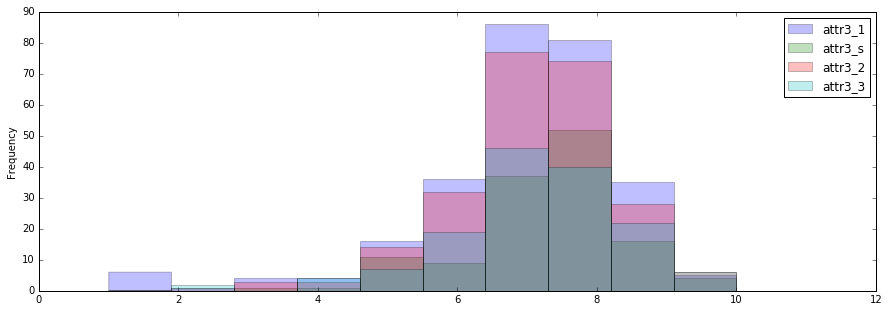

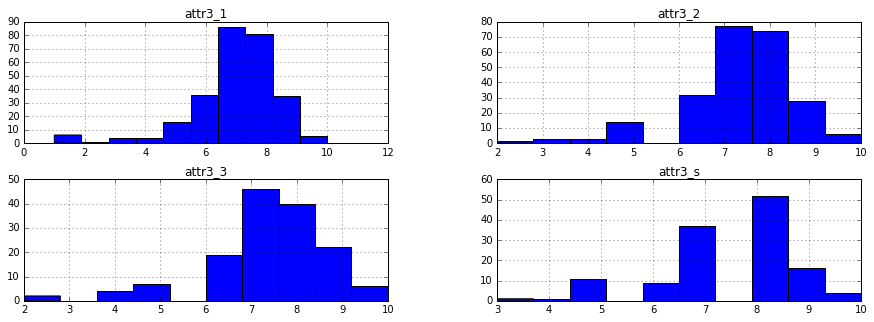

In [55]:
attr_for_hist = ['attr3_1', 'attr3_s', 'attr3_2', 'attr3_3']
stuff_for_attr_hist = pd.DataFrame(data = {'attr3_1': self_rating_on_the_day_women['attr3_1'], 'attr3_s' : self_rating_half_way_women['attr3_s'], 
                                           'attr3_2': self_rating_day_after_women['attr3_2'],
                                          'attr3_3': self_rating_weeks_after_women['attr3_3']}, columns = attr_for_hist)
#stuff_for_attr_hist.plot.hist(stacked = False, bins = 10, figsize = (15, 5), alpha = .25)
#stuff_for_attr_hist.hist(stacked = True, bins = 10, figsize = (15, 5))
#stuff_for_attr_hist.describe()

In [34]:
stuff_for_attr_hist.describe()

,attr3_1,attr3_s,attr3_2,attr3_3
count,274.000000,131.000000,238.000000,146.000000
mean,7.105839,7.442748,7.260504,7.321918
std,1.605771,1.253673,1.318241,1.438078
min,1.000000,3.000000,2.000000,2.000000
25%,7.000000,7.000000,7.000000,7.000000
50%,7.000000,8.000000,7.000000,7.000000
75%,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [35]:
sinc_for_hist = ['sinc3_1', 'sinc3_s', 'sinc3_2', 'sinc3_3']
stuff_for_sinc_hist = pd.DataFrame(data = {'sinc3_1': self_rating_on_the_day_women['sinc3_1'], 'sinc3_s' : self_rating_half_way_women['sinc3_s'], 
                                           'sinc3_2': self_rating_day_after_women['sinc3_2'],
                                          'sinc3_3': self_rating_weeks_after_women['sinc3_3']}, columns = sinc_for_hist)
#stuff_for_sinc_hist.plot.hist(stacked = True, bins = 10, figsize = (15, 5))
#stuff_for_sinc_hist.hist(stacked = True, bins = 10, figsize = (15, 5))

In [36]:
stuff_for_sinc_hist.describe()

,sinc3_1,sinc3_s,sinc3_2,sinc3_3
count,274.000000,131.000000,238.000000,146.000000
mean,8.306569,8.278626,8.163866,8.253425
std,1.741803,1.373037,1.515892,1.363624
min,1.000000,3.000000,2.000000,3.000000
25%,8.000000,8.000000,7.250000,8.000000
50%,9.000000,8.000000,8.000000,8.000000
75%,9.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000


In [65]:
intel_for_hist = ['intel3_1', 'intel3_s', 'intel3_2', 'intel3_3']
stuff_for_intel_hist = pd.DataFrame(data = {'intel3_1': self_rating_on_the_day_women['intel3_1'], 'intel3_s' : self_rating_half_way_women['intel3_s'], 
                                           'intel3_2': self_rating_day_after_women['intel3_2'],
                                          'intel3_3': self_rating_weeks_after_women['intel3_3']}, columns = intel_for_hist)
#stuff_for_intel_hist.plot.hist(stacked = False, bins = 10, figsize = (15, 5), alpha =.25)
#stuff_for_intel_hist.hist(stacked = True, bins = 10, figsize = (15, 5))
#stuff_for_intel_hist.describe()

,fun1_1,fun1_s,fun1_2,fun1_3
count,274.000000,115.000000,237.000000,146.000000
mean,16.983431,15.532522,17.394895,15.851301
std,6.048468,5.737216,5.946725,5.109891
min,0.000000,0.000000,0.000000,0.000000
25%,15.000000,11.605000,15.000000,12.740000
50%,17.585000,16.670000,17.540000,16.500000
75%,20.000000,19.590000,20.000000,20.000000
max,40.000000,40.000000,50.000000,30.000000


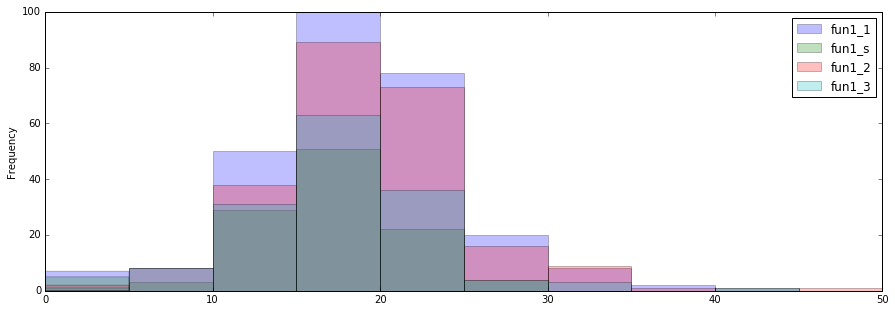

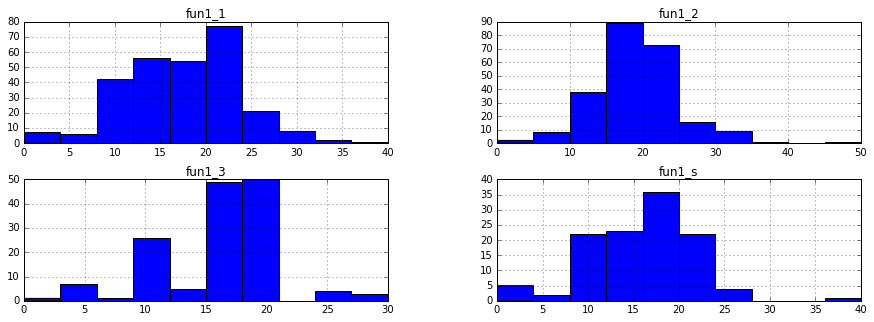

In [57]:
fun_for_hist = ['fun1_1', 'fun1_s', 'fun1_2', 'fun1_3']
stuff_for_fun_hist = pd.DataFrame(data = {'fun1_1': women_at_start['fun1_1'], 'fun1_s' : waves_6_9_women['fun1_s'], 'fun1_2': women_day_after['fun1_2'],
                                          'fun1_3': women_weeks_after['fun1_3']}, columns = fun_for_hist)
#stuff_for_fun_hist.plot.hist(stacked = False, bins = 10, figsize = (15, 5), alpha = .25)
#stuff_for_fun_hist.hist(stacked = True, bins = 10, figsize = (15, 5))
#stuff_for_fun_hist.describe()

In [40]:
stuff_for_fun_hist.describe()

,fun1_1,fun1_s,fun1_2,fun1_3
count,274.000000,115.000000,237.000000,146.000000
mean,16.983431,15.532522,17.394895,15.851301
std,6.048468,5.737216,5.946725,5.109891
min,0.000000,0.000000,0.000000,0.000000
25%,15.000000,11.605000,15.000000,12.740000
50%,17.585000,16.670000,17.540000,16.500000
75%,20.000000,19.590000,20.000000,20.000000
max,40.000000,40.000000,50.000000,30.000000


In [41]:
amb_for_hist = ['amb1_1', 'amb1_s', 'amb1_2', 'amb1_3']
stuff_for_amb_hist = pd.DataFrame(data = {'amb1_1': women_at_start['amb1_1'], 'amb1_s' : waves_6_9_women['amb1_s'], 'amb1_2': women_day_after['amb1_2'],
                                          'amb1_3': women_weeks_after['amb1_3']}, columns = amb_for_hist)
#stuff_for_amb_hist.plot.hist(stacked = True, bins = 10, figsize = (15, 5))
#stuff_for_amb_hist.hist(stacked = True, bins = 10, figsize = (15, 5))

In [42]:
stuff_for_amb_hist.describe()

,amb1_1,amb1_s,amb1_2,amb1_3
count,274.000000,115.000000,237.000000,146.000000
mean,12.584562,12.882261,11.495148,12.294178
std,5.677342,5.495261,5.207794,5.681105
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,10.000000
50%,15.000000,14.890000,10.000000,15.000000
75%,16.592500,16.670000,15.000000,15.910000
max,30.000000,21.950000,22.220000,30.000000


In [43]:
shar_for_hist = ['shar1_1', 'shar1_s', 'shar1_2', 'shar1_3']
stuff_for_shar_hist = pd.DataFrame(data = {'shar1_1': women_at_start['shar1_1'], 'shar1_s' : waves_6_9_women['shar1_s'], 'shar1_2': women_day_after['shar1_2'],
                                          'shar1_3': women_weeks_after['shar1_3']}, columns = shar_for_hist)
#stuff_for_shar_hist.plot.hist(stacked = True, bins = 10, figsize = (15, 5))
#stuff_for_shar_hist.hist(stacked = True, bins = 10, figsize = (15, 5))

In [44]:
stuff_for_shar_hist.describe()

,shar1_1,shar1_s,shar1_2,shar1_3
count,274.000000,115.000000,237.000000,146.000000
mean,12.419781,13.866261,13.916962,14.129589
std,6.136102,5.907598,6.643789,6.846931
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,10.000000
50%,12.885000,15.000000,15.000000,15.000000
75%,16.000000,16.670000,17.860000,18.000000
max,30.000000,30.000000,35.000000,55.000000


In [45]:
#holder

In [46]:
unique_iid[unique_iid['gender'] == 1].describe()['gender']['count'] / 21

13.19047619047619